### Seasonal Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
#import dataset
df = pd.read_csv('MER_T12_06.csv')
df.tail()


,MSN,YYYYMM,Value,Column_Order,Description,Unit
5089,TXEIEUS,201603,115.997,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5090,TXEIEUS,201604,113.815,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5091,TXEIEUS,201605,129.44,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5092,TXEIEUS,201606,172.074,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5093,TXEIEUS,201607,201.958,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [4]:
df.describe()

,YYYYMM,Column_Order
count,5094.000000,5094.000000
mean,199434.171378,5.000000
std,1257.074138,2.582242
min,197301.000000,1.000000
25%,198312.000000,3.000000
50%,199410.500000,5.000000
75%,200509.000000,7.000000
max,201607.000000,9.000000


In [5]:
#change to timeseries
df.YYYYMM = pd.to_datetime(df.YYYYMM, format='%Y%m', errors = 'coerce')

In [6]:
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [7]:
df.set_index(df.YYYYMM, inplace = True)

In [8]:
df.Value[df.Value == 'Not Available'] = None

In [9]:
df.isnull().sum()

MSN               0
YYYYMM          387
Value           416
Column_Order      0
Description       0
Unit              0
dtype: int64

In [10]:
df_no_null = df.dropna(axis = 'rows')

In [11]:
df_no_null.Value = pd.to_numeric(df_no_null.Value)
df_pivot = df_no_null.pivot_table(index = df_no_null.YYYYMM, columns='Description', values = 'Value')

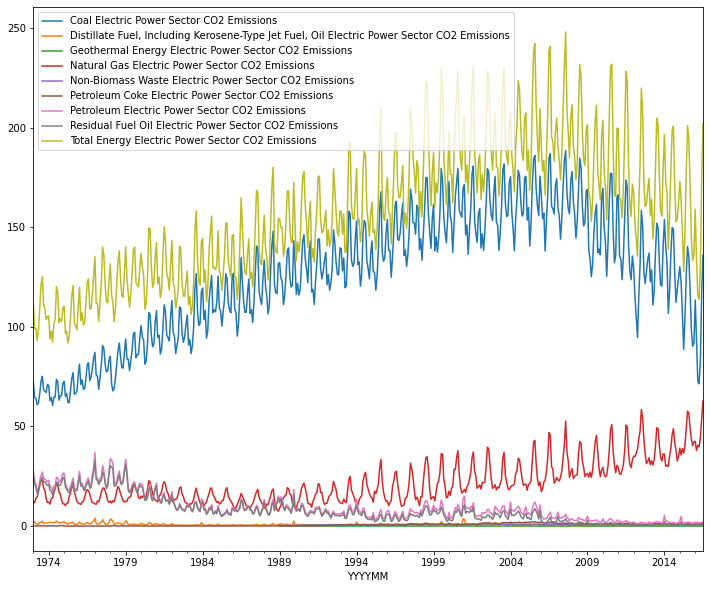

In [12]:
df_pivot.plot(figsize = (12,10))
plt.legend()
plt.show()

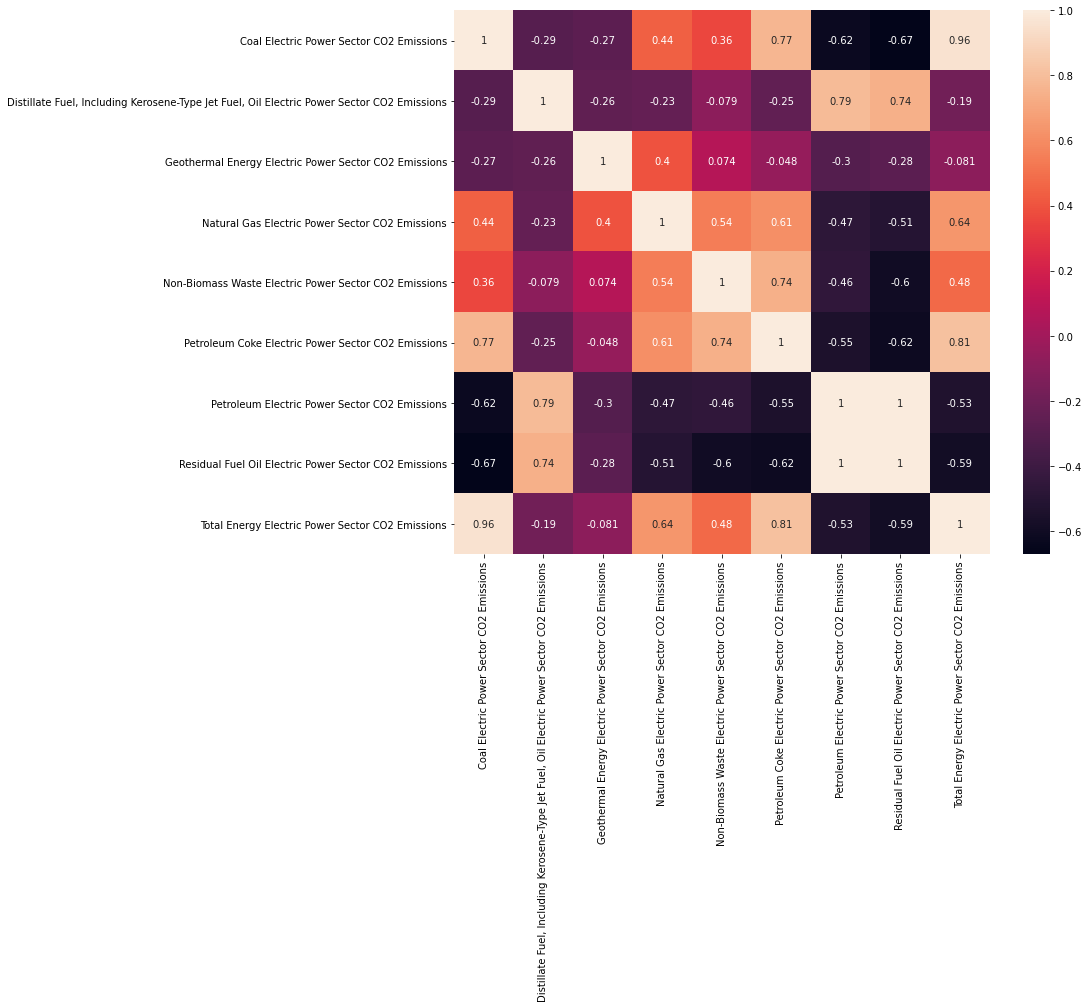

In [13]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_pivot.corr(), annot=True, cbar=True)
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Take a variable for seasonal time series analysis's exercise.
Let's try with Natural Gas Electric Power Sector CO2 Emissions

In [14]:
ng_series = df_pivot['Natural Gas Electric Power Sector CO2 Emissions']
ng_series.head()

YYYYMM
1973-01-01    12.175
1973-02-01    11.708
1973-03-01    13.994
1973-04-01    14.627
1973-05-01    17.344
Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

#### Gathering insights from plotting

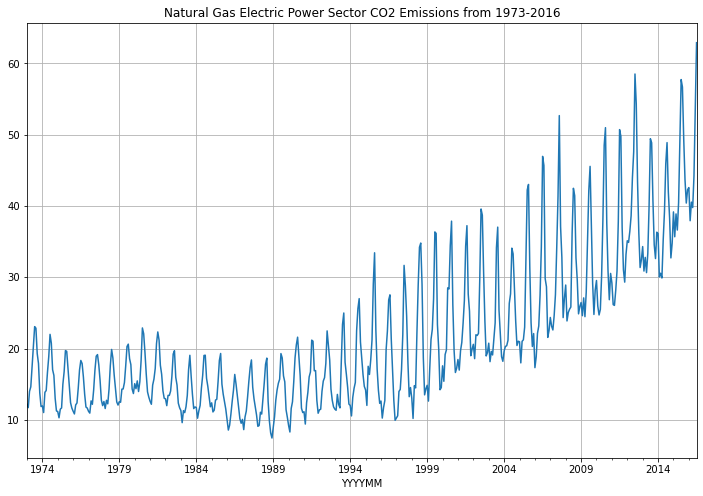

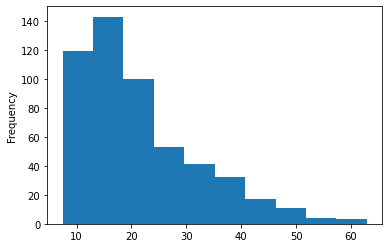

In [15]:
ng_series.plot(grid= True, figsize = (12, 8))
plt.title('Natural Gas Electric Power Sector CO2 Emissions from 1973-2016', size = 12)
plt.show()

ng_series.plot(kind = 'hist')
plt.show()

From plot above, we can see the seasonal pattern and trend with value increasing over time. We try to plot ACF and PACF for further identifcation.

#### Plotting ACF and PCF for further insights

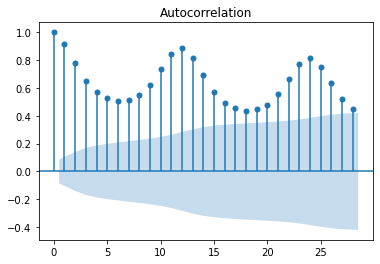

In [16]:
#library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ng_series);

### Stationary, Transform Seasonality and Trend
#### 1. Differencing

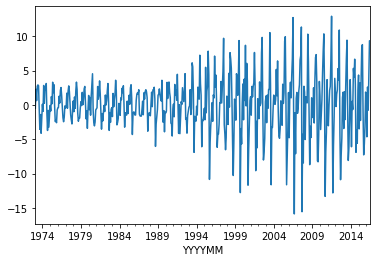

In [17]:
#Plotting
ng_series.diff().dropna().plot()
plt.show()

In [18]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(ng_series.diff().dropna())
adf_test

(-5.435115663121033,
 2.8570111116574967e-06,
 18,
 503,
 {'1%': -3.4434175660489905,
  '5%': -2.8673031724657454,
  '10%': -2.5698395516760275},
 2129.4454545202807)

#### 2. Power Transform using Box-Cox Transform (include/exclude differencing)

Below are some common values for lambda:

lambda = -1. is a reciprocal transform.

lambda = -0.5 is a reciprocal square root transform.

lambda = 0.0 is a log transform.

lambda = 0.5 is a square root transform.

lambda = 1.0 is no transform.

In [19]:
from scipy.stats import boxcox

ng_series = pd.DataFrame(ng_series)
ng_series



,Natural Gas Electric Power Sector CO2 Emissions
YYYYMM,
1973-01-01,12.175
1973-02-01,11.708
1973-03-01,13.994
1973-04-01,14.627
1973-05-01,17.344
...,...
2016-03-01,40.525
2016-04-01,39.763
2016-05-01,44.210


In [20]:
ng_series['boxcox'], lamb = boxcox(ng_series['Natural Gas Electric Power Sector CO2 Emissions'])
print(lamb)


-0.448902013736244


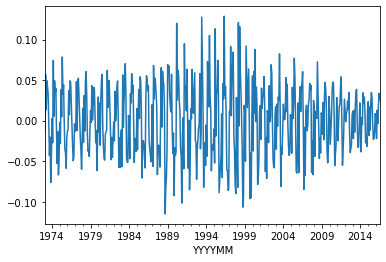

(-4.972513082378959,
 2.514760520277002e-05,
 18,
 503,
 {'1%': -3.4434175660489905,
  '5%': -2.8673031724657454,
  '10%': -2.5698395516760275},
 -2312.122483921379)

In [21]:
ng_series.boxcox.diff().dropna().plot()
plt.show()

#ADF
adf_test = adfuller(ng_series.boxcox.diff().dropna())
adf_test

#### 3. Moving Average (include/exclude differencing)

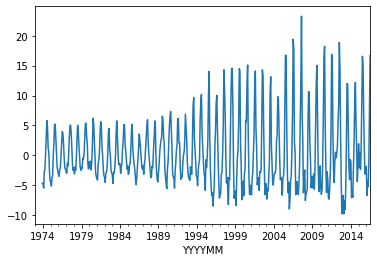

In [22]:
data_value = ng_series['Natural Gas Electric Power Sector CO2 Emissions']
ma = data_value.rolling(12).mean()

differenced_ma = data_value - ma
differenced_ma.plot()
plt.show()

In [23]:
adf_test = adfuller(differenced_ma.dropna())
adf_test

(-5.138976692333442,
 1.1697866171000438e-05,
 19,
 492,
 {'1%': -3.4437112724287253,
  '5%': -2.8674324209387345,
  '10%': -2.569908433637385},
 2003.3390245585367)

#### 4. Residual in seasonal decompose

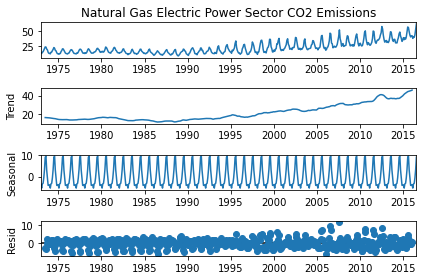

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(data_value).plot()
plt.show()

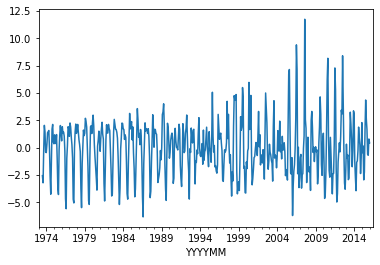

In [25]:
decompose = seasonal_decompose(data_value)
decompose.resid.plot()
plt.show()

In [26]:
adf_test = adfuller(decompose.resid.dropna())
adf_test

(-8.547083808873642,
 9.439345281556007e-14,
 19,
 491,
 {'1%': -3.4437386290417082,
  '5%': -2.867444458865948,
  '10%': -2.5699148492415413},
 1765.0376796769326)

Let's choose the suitable one. When data is already stationary, we can say it is the best data. If we transform and force to be stationary, we should retransform after fit the model to our data train, so we take the diferrenced transformation and pay attention to it in the next phase : <b> estimating parameters

### Parameters Estimation

The common methods to estimating parameters for our time series forecasting model are (1) ACF and PACF plots, and (2) grid search using Information Criterion. We will try intepreting using both methods.

#### Intepreting ACF and PACF

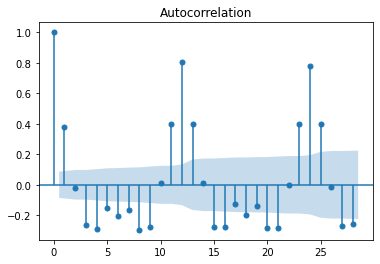

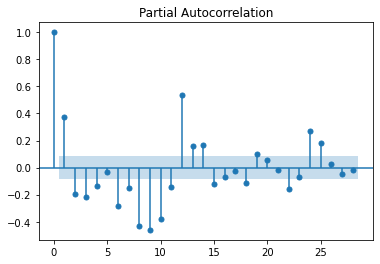

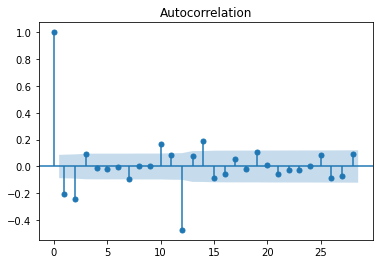

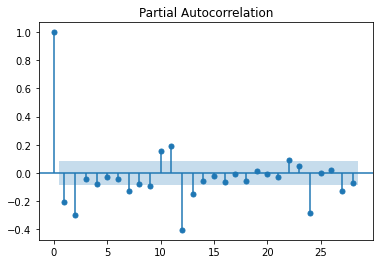

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_acf

#ACF-PACF Differenced Series
differenced_series = ng_series['Natural Gas Electric Power Sector CO2 Emissions'].diff().dropna()
plot_acf(differenced_series)
plot_pacf(differenced_series)
plt.show()

#ACF-PACF for Seasonal
differenced_seasonal = differenced_series.diff(12).dropna()
plot_acf(differenced_seasonal)
plot_pacf(differenced_seasonal)
plt.show()

From plots above, the first and second one are differenced with 1 lag data point. We can confirm there is pattern every 12 lag, so it's a seasonal pattern. We expect the AR params is 1. 
The third and the last one are differenced 12 lags in differenced 1 lag data point. We expect AR params is 2 based on PACF. For further estimation, we can use second method using Information Criterion.

In [38]:
#Estimating parameters using Information Criterion
import itertools

p = q = range(4)
d = range(0, 2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]